In [57]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2 
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D, Dropout
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [58]:

train_val_dir = "C:\\Users\\LENOVO\\Downloads\\charts\\charts\\train_val"
validation_dir = "C:\\Users\\LENOVO\\Downloads\\charts\\charts\\train_val"
test_dir = "C:\\Users\\LENOVO\\Downloads\\charts\\charts\\test"
train_path_labels = "C:\\Users\\LENOVO\\Downloads\\charts\\charts\\train_val.csv"
train_val_labels = pd.read_csv(train_path_labels)

In [59]:


images = []
labels = []

for filename in os.listdir(train_val_dir): 
    if filename.endswith('.png'):
        
        img = cv2.imread(os.path.join(train_val_dir, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        img_array = np.array(img)
       
        images.append(img_array)
        labels.append(filename)
        

le = LabelEncoder()
labels = le.fit_transform(labels)
        

images = np.array(images) 
labels = np.array(labels)

np.save('x_train.npy', images)
np.save('y_train.npy', labels)
x_train = np.load('x_train.npy')                  
y_train = np.load('y_train.npy')

In [60]:
x_train.shape

(1000, 128, 128, 3)

In [61]:
x_train[:5]
y_train[:5]

array([0, 1, 2, 3, 4], dtype=int64)

In [62]:


images = []
labels = []

for filename in os.listdir(test_dir): 
    if filename.endswith('.png'): 
        
        img = cv2.imread(os.path.join(test_dir, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        img_array = np.array(img)
       
        images.append(img_array)
        labels.append(filename)


le = LabelEncoder()
labels = le.fit_transform(labels)
        

images = np.array(images) 
labels = np.array(labels)


np.save('x_test.npy', images)
np.save('y_test.npy', labels)

x_test = np.load('x_test.npy')                  
y_test = np.load('y_test.npy')   

In [63]:
x_test.shape

(50, 128, 128, 3)

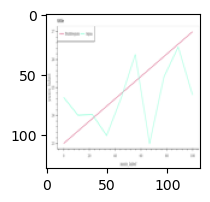

In [8]:

plt.figure(figsize = (10,2))
plt.imshow(x_train[10])
plt.imshow(x_train[208])
plt.imshow(x_train[444])

In [9]:

image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
image_classes[0]


label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_val_labels['type']])

y_train
y_train.shape
y_test.shape

(50,)

In [10]:


def image_sample(x, y, index):
    plt.figure(figsize = (10,2))
    plt.imshow(x[index])

    plt.xlabel(image_classes[y[index]])

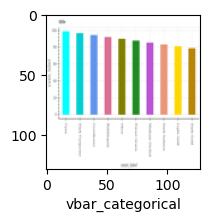

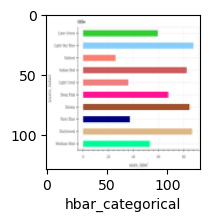

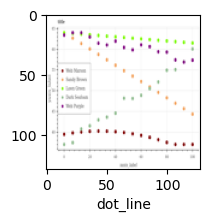

In [11]:
image_sample(x_train,y_train,0)
image_sample(x_train,y_train,208)
image_sample(x_train,y_train,999)

In [13]:


x_train=x_train /255
x_test=x_train /255

In [14]:
x_test.shape

(1000, 128, 128, 3)

In [15]:

y_train_index = train_val_labels['image_index']
y_train_type = train_val_labels['type']

In [16]:
y_train_type[:5]

0    vbar_categorical
1    vbar_categorical
2    vbar_categorical
3    vbar_categorical
4    vbar_categorical
Name: type, dtype: object

In [17]:

model = Sequential([
    Flatten(input_shape=(128,128,3)), 
    Dense(3000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train,y_train,epochs=10)

Epoch 1/10
32/32 [==============================] - 34s 981ms/step - loss: 5.8075 - accuracy: 0.2210
Epoch 2/10
32/32 [==============================] - 30s 923ms/step - loss: 1.5798 - accuracy: 0.2890
Epoch 3/10
32/32 [==============================] - 31s 955ms/step - loss: 1.5923 - accuracy: 0.2560
Epoch 4/10
32/32 [==============================] - 31s 978ms/step - loss: 1.5674 - accuracy: 0.2660
Epoch 5/10
32/32 [==============================] - 32s 984ms/step - loss: 1.5625 - accuracy: 0.2950
Epoch 6/10
32/32 [==============================] - 30s 934ms/step - loss: 1.5340 - accuracy: 0.3160
Epoch 7/10
32/32 [==============================] - 32s 989ms/step - loss: 1.5482 - accuracy: 0.2990
Epoch 8/10
32/32 [==============================] - 31s 973ms/step - loss: 1.5464 - accuracy: 0.2950
Epoch 9/10
32/32 [==============================] - 34s 1s/step - loss: 1.5452 - accuracy: 0.2990
Epoch 10/10
32/32 [==============================] - 29s 916ms/step - loss: 1.4835 - accuracy:

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [19]:
model.evaluate(x_test,y_test)


7/7 [==============================] - 2s 204ms/step - loss: 1.5772 - accuracy: 0.2250


[1.5771703720092773, 0.22499999403953552]

In [20]:
y_pred = model.predict(x_test)
y_pred
y_pred_classes = [np.argmax(ele) for ele in y_pred]


7/7 [==============================] - 1s 193ms/step


In [22]:
print("Train Images Shape:", x_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Images Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape) 

Train Images Shape: (800, 128, 128, 3)
Train Labels Shape: (800,)
Test Images Shape: (200, 128, 128, 3)
Test Labels Shape: (200,)


Epoch 1/50
1/1 [==============================] - 23s 23s/step - loss: 1.6115 - accuracy: 0.2412 - val_loss: 1.9493 - val_accuracy: 0.3100
Epoch 2/50
1/1 [==============================] - 11s 11s/step - loss: 1.8961 - accuracy: 0.3113 - val_loss: 1.7028 - val_accuracy: 0.2400
Epoch 3/50
1/1 [==============================] - 11s 11s/step - loss: 1.7487 - accuracy: 0.1900 - val_loss: 1.6291 - val_accuracy: 0.1650
Epoch 4/50
1/1 [==============================] - 10s 10s/step - loss: 1.6398 - accuracy: 0.2087 - val_loss: 1.5858 - val_accuracy: 0.2050
Epoch 5/50
1/1 [==============================] - 12s 12s/step - loss: 1.5793 - accuracy: 0.2300 - val_loss: 1.5851 - val_accuracy: 0.1950
Epoch 6/50
1/1 [==============================] - 12s 12s/step - loss: 1.5708 - accuracy: 0.2050 - val_loss: 1.5638 - val_accuracy: 0.3150
Epoch 7/50
1/1 [==============================] - 12s 12s/step - loss: 1.5489 - accuracy: 0.3375 - val_loss: 1.5414 - val_accuracy: 0.3250
Epoch 8/50
1/1 [===========

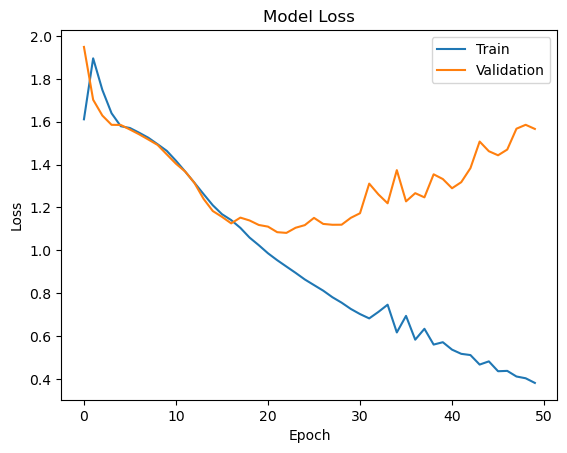

In [23]:
cnn_model = Sequential([
    Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),    
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [24]:
cnn_model.evaluate(x_test,y_test)

7/7 [==============================] - 1s 95ms/step - loss: 1.5666 - accuracy: 0.5600


[1.5666295289993286, 0.5600000023841858]

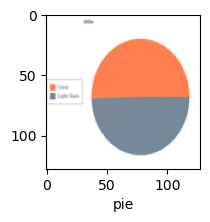

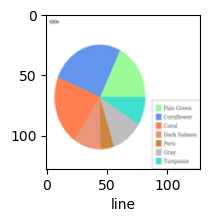

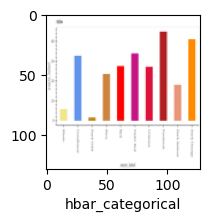

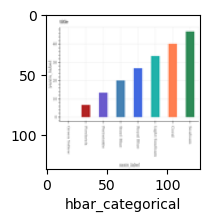

In [25]:
image_sample(x_test,y_test,1)
image_sample(x_test,y_test,50)
image_sample(x_test,y_test,25)
image_sample(x_test,y_test,30)

In [27]:
y_pred = cnn_model.predict(x_test)
y_pred[:5]

7/7 [==============================] - 1s 100ms/step


array([[6.67517543e-01, 1.25628784e-01, 1.87781885e-01, 3.97690758e-03,
        1.50949415e-02],
       [1.96953882e-02, 1.84385385e-02, 1.35882208e-02, 1.81918684e-02,
        9.30085957e-01],
       [1.30612746e-01, 1.30412057e-02, 3.20157707e-02, 1.27275223e-02,
        8.11602771e-01],
       [9.95937109e-01, 8.27786284e-09, 1.35796715e-03, 4.38701943e-04,
        2.26625707e-03],
       [6.95892990e-01, 2.16097906e-02, 2.77377427e-01, 9.62067046e-04,
        4.15769313e-03]], dtype=float32)

In [28]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 4, 4, 0, 0]

In [29]:
y_test[:5]

array([0, 4, 4, 4, 0])

'dot_line'

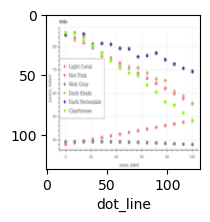

In [31]:


image_sample(x_test,y_test,15) 
image_classes[y_classes[15]] 

In [33]:
print("classification report: \n", classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.42      0.57      0.48        37
           1       0.78      0.70      0.74        44
           2       0.62      0.42      0.50        48
           3       0.43      0.55      0.48        33
           4       0.61      0.58      0.59        38

    accuracy                           0.56       200
   macro avg       0.57      0.56      0.56       200
weighted avg       0.59      0.56      0.56       200



In [34]:
 
conf_mat = confusion_matrix(y_test, y_classes)

print('Confusion Matrix:')
print(conf_mat)

Confusion Matrix:
[[21  4  2  2  8]
 [ 7 31  2  2  2]
 [10  1 20 17  0]
 [ 1  3  7 18  4]
 [11  1  1  3 22]]


Text(95.72222222222221, 0.5, 'Actual')

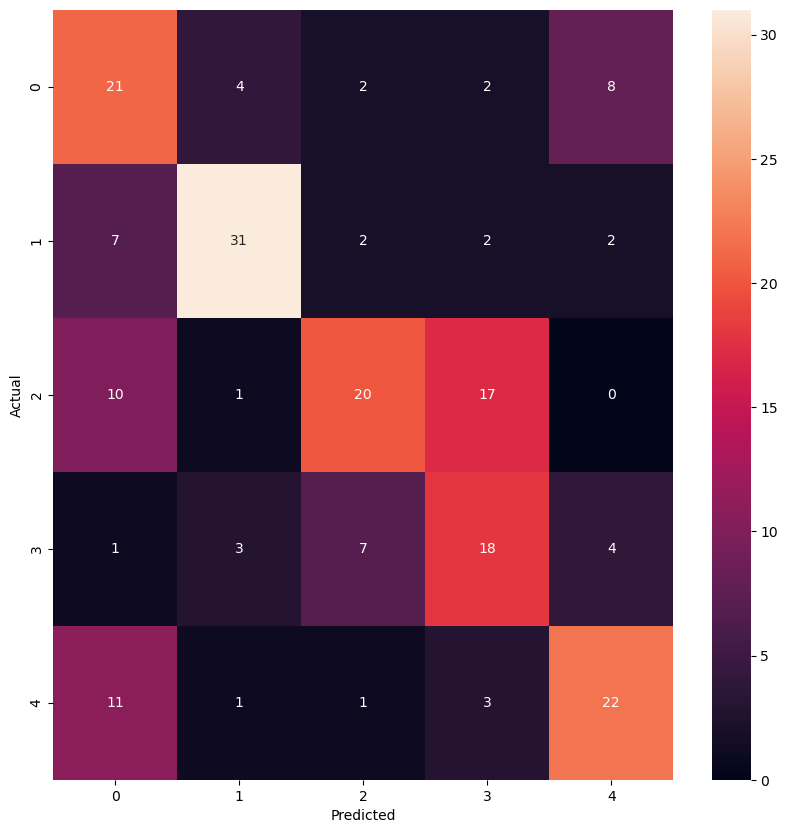

In [35]:

import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [37]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator


vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

58889256/58889256 [==============================] - 17s 0us/step


In [41]:

for layer in vgg16_model.layers:
    layer.trainable = False

In [42]:
from keras.optimizers import Adam

x = vgg16_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x) 
x = Dropout(0.5)(x)

predictions = Dense(1, activation='softmax')(x)
pt_model = tf.keras.Model(inputs=vgg16_model.input, outputs=predictions)

In [43]:
pt_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-5), metrics=['accuracy'])

In [44]:
pt_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [45]:
 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [46]:
train_data_dir = "C:\\Users\\LENOVO\\Downloads\\charts\\charts\\train_val"
val_data_dir = "C:\\Users\\LENOVO\\Downloads\\charts\\charts\\train_val"

test_dir = "C:\\Users\\LENOVO\\Downloads\\charts\\charts\\test"

In [55]:
train_generator =  train_datagen.flow(
    x_train, y_train, 
    batch_size=16, 
   )
 
val_generator = val_datagen.flow(
    x_test, y_test,
    batch_size=16, 
    )
    

In [48]:
os.listdir(train_data_dir)

['0.png',
 '1.png',
 '10.png',
 '100.png',
 '101.png',
 '102.png',
 '103.png',
 '104.png',
 '105.png',
 '106.png',
 '107.png',
 '108.png',
 '109.png',
 '11.png',
 '110.png',
 '111.png',
 '112.png',
 '113.png',
 '114.png',
 '115.png',
 '116.png',
 '117.png',
 '118.png',
 '119.png',
 '12.png',
 '120.png',
 '121.png',
 '122.png',
 '123.png',
 '124.png',
 '125.png',
 '126.png',
 '127.png',
 '128.png',
 '129.png',
 '13.png',
 '130.png',
 '131.png',
 '132.png',
 '133.png',
 '134.png',
 '135.png',
 '136.png',
 '137.png',
 '138.png',
 '139.png',
 '14.png',
 '140.png',
 '141.png',
 '142.png',
 '143.png',
 '144.png',
 '145.png',
 '146.png',
 '147.png',
 '148.png',
 '149.png',
 '15.png',
 '150.png',
 '151.png',
 '152.png',
 '153.png',
 '154.png',
 '155.png',
 '156.png',
 '157.png',
 '158.png',
 '159.png',
 '16.png',
 '160.png',
 '161.png',
 '162.png',
 '163.png',
 '164.png',
 '165.png',
 '166.png',
 '167.png',
 '168.png',
 '169.png',
 '17.png',
 '170.png',
 '171.png',
 '172.png',
 '173.png',
 '17

In [56]:

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

history = pt_model.fit(train_generator, epochs=10, validation_data=val_generator, callbacks=[es])

Epoch 1/10
50/50 [==============================] - 150s 3s/step - loss: -0.9181 - accuracy: 0.1950 - val_loss: -2.5863 - val_accuracy: 0.2200
Epoch 2/10
50/50 [==============================] - 214s 4s/step - loss: -3.8088 - accuracy: 0.1950 - val_loss: -4.7043 - val_accuracy: 0.2200
Epoch 3/10
50/50 [==============================] - 303s 6s/step - loss: -5.8567 - accuracy: 0.1950 - val_loss: -6.3634 - val_accuracy: 0.2200
Epoch 4/10
50/50 [==============================] - 201s 4s/step - loss: -7.5566 - accuracy: 0.1950 - val_loss: -7.9495 - val_accuracy: 0.2200
Epoch 5/10
50/50 [==============================] - 180s 4s/step - loss: -9.1441 - accuracy: 0.1950 - val_loss: -9.5643 - val_accuracy: 0.2200
Epoch 6/10
50/50 [==============================] - 180s 4s/step - loss: -10.8494 - accuracy: 0.1950 - val_loss: -11.2401 - val_accuracy: 0.2200
Epoch 7/10
50/50 [==============================] - 179s 4s/step - loss: -12.8097 - accuracy: 0.1950 - val_loss: -13.0134 - val_accuracy: 0.